importing the data 



In [11]:
import pandas as pd


df = pd.read_excel("/Users/shivkumar/Documents/phone_usage_india.excel.xlsx")

print(df)

      User ID  Age  Gender   Location Phone Brand       OS  \
0      U00001   53    Male     Mumbai        Vivo  Android   
1      U00002   60   Other      Delhi      Realme      iOS   
2      U00003   37  Female  Ahmedabad       Nokia  Android   
3      U00004   32    Male       Pune     Samsung  Android   
4      U00005   16    Male     Mumbai      Xiaomi      iOS   
...       ...  ...     ...        ...         ...      ...   
17681  U17682   27   Other     Mumbai       Apple      iOS   
17682  U17683   40  Female    Chennai        Oppo      iOS   
17683  U17684   34  Female  Ahmedabad      Realme  Android   
17684  U17685   22    Male  Hyderabad        Vivo  Android   
17685  U17686   43   Other    Kolkata        Oppo      iOS   

       Screen Time (hrs/day)  Data Usage (GB/month)  \
0                        3.7                   23.9   
1                        9.2                   28.1   
2                        4.5                   12.3   
3                       11.0       

In [13]:
df.head(2)

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming


Check for missing or inconsistent data.

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

Analysis and Insights


In [18]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use'],
      dtype='object')

Average screen time by age group and city.

In [19]:
df.groupby('Age')['Screen Time (hrs/day)'].sum()

Age
15    2685.5
16    2671.5
17    2308.5
18    2308.8
19    2728.0
20    2538.1
21    2560.7
22    2520.3
23    2451.6
24    2651.6
25    2489.3
26    2480.3
27    2345.7
28    2626.6
29    2354.7
30    2596.2
31    2429.9
32    2447.1
33    2547.5
34    2434.1
35    2608.0
36    2668.5
37    2560.6
38    2285.8
39    2526.0
40    2593.9
41    2508.4
42    2343.5
43    2277.8
44    2447.0
45    2429.5
46    2839.6
47    2595.1
48    2547.1
49    2387.6
50    2684.1
51    2462.5
52    2581.1
53    2502.5
54    2654.6
55    2425.2
56    2479.6
57    2445.8
58    2894.1
59    2535.9
60    2319.4
Name: Screen Time (hrs/day), dtype: float64

In [28]:
max_screen_time = df.groupby('Age')['Screen Time (hrs/day)'].sum().idxmax()

In [29]:
print(max_screen_time)

58


In [39]:
df.groupby('Location')['Screen Time (hrs/day)'].sum()

Location
Ahmedabad    11716.5
Bangalore    11738.5
Chennai      11684.9
Delhi        11480.7
Hyderabad    11212.7
Jaipur       12136.0
Kolkata      11471.7
Lucknow      11184.0
Mumbai       11057.0
Pune         12097.2
Name: Screen Time (hrs/day), dtype: float64

Correlation between data usage and screen time.

In [31]:
correlation = df['Data Usage (GB/month)'].corr(df['Screen Time (hrs/day)'])
print(f"Correlation between data usage and screen time: {correlation}")

Correlation between data usage and screen time: 0.00032579988493293345


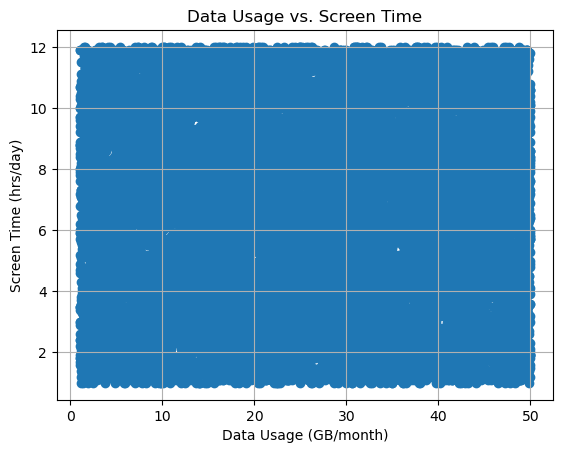

In [35]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['Data Usage (GB/month)'], df['Screen Time (hrs/day)'])
plt.title("Data Usage vs. Screen Time")
plt.xlabel("Data Usage (GB/month)")
plt.ylabel("Screen Time (hrs/day)")
plt.grid(True)
plt.show()

Distribution of primary phone use.

In [36]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use'],
      dtype='object')

In [38]:
primary_phone = df.value_counts('Primary Use')

print(primary_phone)

Primary Use
Education        3601
Gaming           3576
Work             3557
Social Media     3501
Entertainment    3451
Name: count, dtype: int64
